### 主成分分析（PCA，principal components analysis）

#### 数据准备

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

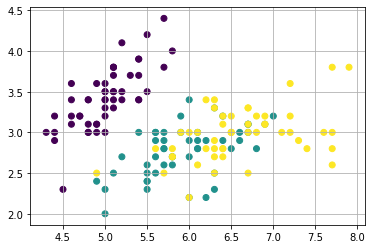

In [4]:
X, y = load_iris(return_X_y=True)
plt.scatter(X[:, 0], X[0:, 1], c=y)
plt.grid()

#### PCA 工作流程
- 1. 创建数据集的协方差矩阵；
- 2. 计算协方差矩阵的特征值；
- 3. 保留前个特征值（按特征值降序排列）；
- 4. 用保留的特征向量转换新的数据点。

In [7]:
cov_mat = np.cov(X.T)              # 1. 创建数据集的协方差矩阵
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)    # 
top2_vec = eig_vec_cov[:, :2]
X_new = np.dot(X, top2_vec)

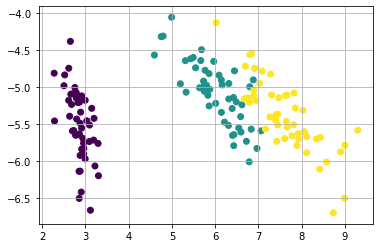

In [9]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.grid()

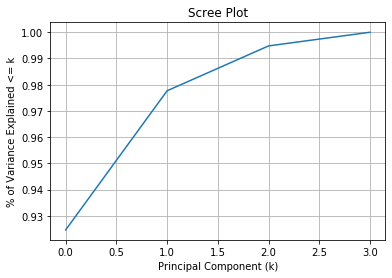

In [10]:
# 碎石图
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')
plt.grid()

In [13]:
# 在sklearn上实现PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)           # 和其他scikit模块一样，先实例化
X_new = pca.fit_transform(X)        # 在数据上使用PCA

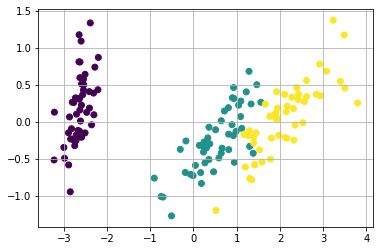

In [14]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.grid()

#### 深入理解主成分

##### 投影前后特征相关性分析

In [15]:
np.corrcoef(X.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [17]:
np.corrcoef(X_new.T)

array([[1.00000000e+00, 9.41554176e-17],
       [9.41554176e-17, 1.00000000e+00]])

#### PCA转换前后特征向量和数据分布探索

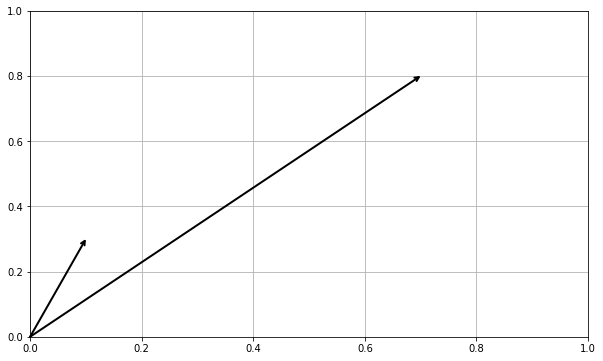

In [37]:
def draw_vector(v0, v1, ax):   # 自定义绘制箭头的函数
    arrow_props = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrow_props)

# 绘制箭头示例
fig, ax = plt.subplots(1, 1, figsize=(10, 6))                 # 创建画布
draw_vector([0, 0], [0.7, 0.8], ax)
draw_vector([0, 0], [0.1, 0.3], ax)
ax.grid()

In [42]:
iris_2_dim = X[:, 2:4]
iris_2_dim = iris_2_dim - iris_2_dim.mean(axis=0)
two_dim_pca = PCA(n_components=2)
iris_2_dim_transformed = two_dim_pca.fit_transform(iris_2_dim)

[(-1, 1),
 Text(0, 0.5, 'component 2'),
 (-3, 3),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'Projected Data')]

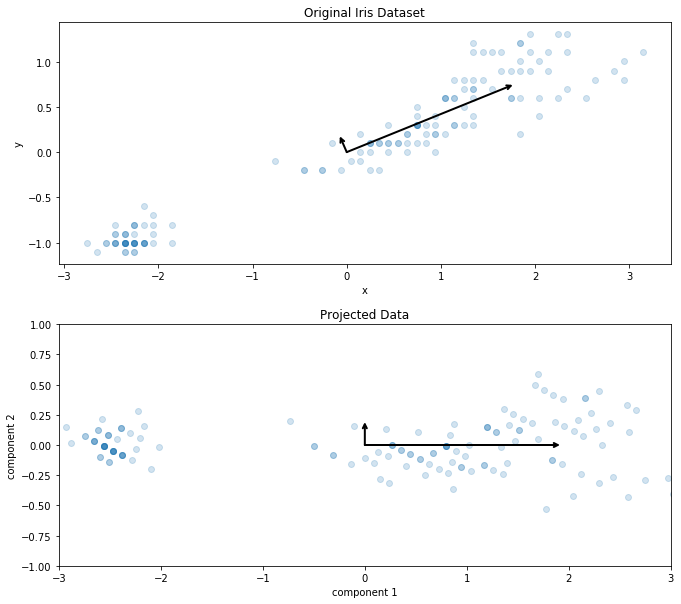

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))                              # 创建画布
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.1, hspace=0.25)          # 画布设置
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)                # 原始空间中的数据点分布
for length, vector in zip(two_dim_pca.explained_variance_, two_dim_pca.components_):
    v = vector * np.sqrt(length)                                            # 拉长向量，和explained_variance对应
    draw_vector(two_dim_pca.mean_, two_dim_pca.mean_ + v, ax=ax[0])         # 画主成分箭头
ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset')

ax[1].scatter(iris_2_dim_transformed[:, 0], iris_2_dim_transformed[:, 1], alpha=0.2)   # 转化后空间中的数据点分布
for length, vector in zip(two_dim_pca.explained_variance_, two_dim_pca.components_):
    transformed_component = two_dim_pca.transform([vector])[0]                         # 将特征向量转换到新坐标空间
    v = transformed_component * np.sqrt(length)                                        # 拉长向量，和explained_variance对应
    draw_vector(iris_2_dim_transformed.mean(axis=0), iris_2_dim_transformed.mean(axis=0) + v, ax=ax[1])
ax[1].set(xlabel='component 1', ylabel='component 2', xlim=(-3, 3), ylim=(-1, 1), title='Projected Data')

### 线性判别分析（LDA，linear discriminant analysis）

#### LDA工作流程
- 1. 计算每个类别的均值向量；
- 2. 计算类内和类间的散布矩阵；
- 3. 计算散布矩阵的特征值和特征向量；
- 4. 降序排列特征值，保留前个特征向量；
- 5. 使用前几个特征向量将数据投影到新空间。

In [45]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
iris_X, iris_y = iris.data, iris.target    # 创建X和y变量，存储特征和响应列
label_dict = {i: k for i, k in enumerate(iris.target_names)}

mean_vectors = []     # 存储每个类别的均值向量
for cl in [0, 1, 2]:
    class_mean_vector = np.mean(iris_X[iris_y == cl], axis=0)  # 计算每类样本均值
    mean_vectors.append(class_mean_vector)         # 存储均值向量
    print(label_dict[cl], class_mean_vector)

# 计算类内散布矩阵
S_W = np.zeros((4, 4))   # 初始类内散步矩阵
for cl, mv in zip([0, 1, 2], mean_vectors):  # 从0开始，计算每个类别的散布矩阵
    class_sc_mat = np.zeros((4, 4))          # 每个类别的散步矩阵
    for row in iris_X[iris_y == cl]:         # 访问该类的每个样本
        row, mv = row.reshape(4, 1), mv.reshape(4, 1)  # 列向量
        class_sc_mat += (row-mv).dot((row-mv).T)       # 4 x 4的矩阵
    S_W += class_sc_mat   # 散布矩阵的和

# 类计算间散布矩阵
overall_mean = np.mean(iris_X, axis=0).reshape(4, 1)   # 数据集的均值
S_B = np.zeros((4, 4))                                 # 初始化类间散布矩阵
for i, mean_vec in enumerate(mean_vectors):
    n = iris_X[iris_y == i, :].shape[0]                # 每种花的数量
    mean_vec = mean_vec.reshape(4, 1)                  # 每种花的列向量
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

# 计算矩阵的特征值和特征向量
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))
eig_vecs = eig_vecs.real
eig_vals = eig_vals.real

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i]
    print('Eigenvector {}: {}'.format(i+1, eigvec_sc))
    print('Eigenvalue {:}: {}'.format(i+1, eig_vals[i]))

setosa [5.006 3.428 1.462 0.246]
versicolor [5.936 2.77  4.26  1.326]
virginica [6.588 2.974 5.552 2.026]
Eigenvector 1: [ 0.20874182  0.38620369 -0.55401172 -0.7073504 ]
Eigenvalue 1: 32.19192919827803
Eigenvector 2: [-0.00653196 -0.58661055  0.25256154 -0.76945309]
Eigenvalue 2: 0.28539104262306414
Eigenvector 3: [ 0.88513899 -0.29455053 -0.27255052 -0.23555291]
Eigenvalue 3: 3.5296362660244315e-15
Eigenvector 4: [-0.80593687  0.40432808  0.41273963 -0.12895956]
Eigenvalue 4: 3.17116800810927e-17


#### LDA转换探究

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X, y = load_iris(return_X_y=True)

In [102]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_new = lda.fit_transform(X, y)

In [103]:
lda.scalings_                   # 特征向量
lda.explained_variance_ratio_   # 类似解释方差

array([0.9912126, 0.0087874])

In [110]:
iris_2_dim = X[:, 2:4]
iris_2_dim = iris_2_dim - iris_2_dim.mean(axis=0)
iris_2_dim_transformed_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(iris_2_dim, y)

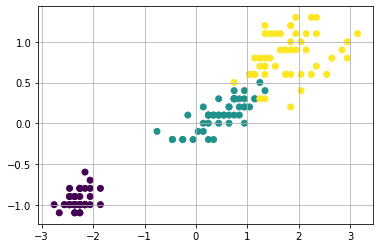

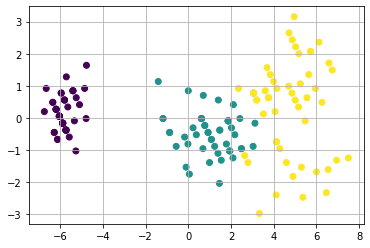

In [111]:
plt.scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], c=y)
plt.grid()
plt.figure()
plt.scatter(iris_2_dim_transformed_lda[:, 0], iris_2_dim_transformed_lda[:, 1], c=y)
plt.grid()

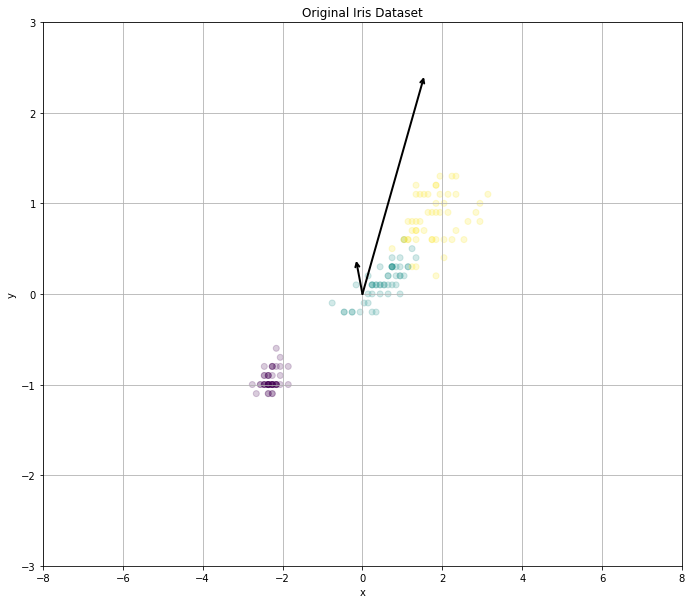

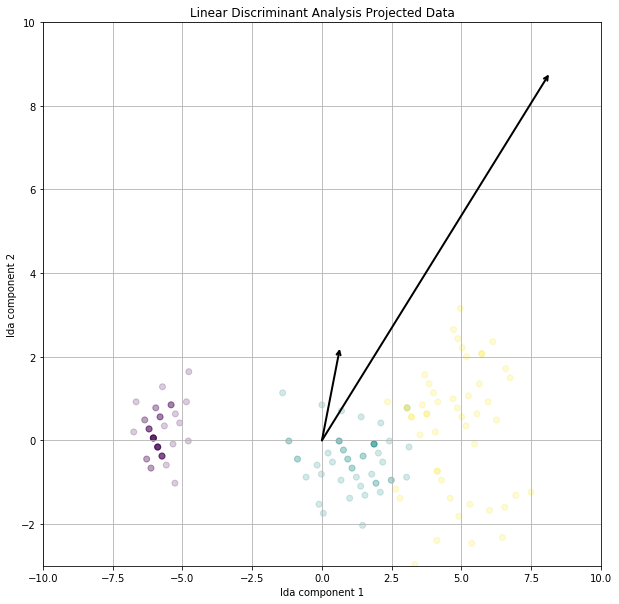

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np


X, y = load_iris(return_X_y=True)

lda = LinearDiscriminantAnalysis(n_components=2)         # 实例化LDA类
X_lda_iris = lda.fit_transform(X, y)                     # 拟合并转换鸢尾花数据


'''
# 下面的代码展示原始数据和用LDA投影后的数据
# 但是在图上，每个都按数据的向量处理
# 长箭头是第一个特征向量，短箭头是第二个
'''
iris_2_dim = X[:, 2:4]                                         # 截取后两列数据
iris_2_dim = iris_2_dim - iris_2_dim.mean(axis=0)              # 中心化
iris_2_dim_transformed_lda = lda.fit_transform(iris_2_dim, y)  # 在截断的数据集上拟合
components = lda.scalings_.T                                   # 转置为和PCA一样，行变成主成分


def draw_vector(v0, v1, ax):
    arrow_props = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrow_props)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1, hspace=0.25)
ax.scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2, c=y)
for length, vector in zip(lda.explained_variance_ratio_, components):
    v = vector * np.sqrt(length)
    draw_vector(lda.xbar_, lda.xbar_ + v, ax=ax)  # lda.xbar_ 等于 pca.mean_
ax.set(xlabel='x', ylabel='y', xlim=(-8, 8), ylim=(-3, 3), title='Original Iris Dataset')
ax.grid()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(iris_2_dim_transformed_lda[:, 0], iris_2_dim_transformed_lda[:, 1], alpha=0.2, c=y)
for length, vector in zip(lda.explained_variance_ratio_, components):
    transformed_component = lda.transform([vector])[0]
    v = transformed_component * np.sqrt(length)
    draw_vector(iris_2_dim_transformed_lda.mean(axis=0), iris_2_dim_transformed_lda.mean(axis=0) + v, ax=ax)
ax.set(xlabel='lda component 1', ylabel='lda component 2', title='Linear Discriminant Analysis Projected Data',
          xlim=(-10, 10), ylim=(-3, 10))
ax.grid()

### 应用特征转换

#### 不同条件下模型性能比较
- 基线模型
- 单判别式模型
- 单主成分模型

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [113]:
X, y = load_iris(return_X_y=True)

In [114]:
# 模型性能基线
knn = KNeighborsClassifier()
cross_val_score(knn, X, y, cv=5).mean()   

0.9733333333333334

In [119]:
# 单判别式模型
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_pipeline = Pipeline([('lda', LinearDiscriminantAnalysis(n_components=1)), ('knn', KNeighborsClassifier())])
cross_val_score(lda_pipeline, X, y).mean()

c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9738562091503268

In [121]:
# 单主成分模型
from sklearn.decomposition import PCA
pca_pipeline = Pipeline([('pca', PCA(n_components=1)), ('knn', KNeighborsClassifier())])
cross_val_score(pca_pipeline, X, y).mean()

c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9272875816993463

#### 综合优化选择

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [136]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('lda', LinearDiscriminantAnalysis()),
    ('clf', KNeighborsClassifier())
])

In [144]:
pipeline_params = {
    'scale__with_std': [True, False],
    'scale__with_mean': [True, False],
    'pca__n_components': [1, 2, 3, 4],
    'lda__n_components': [1, 2],
    'clf__n_neighbors': range(1, 9)
}

In [148]:
grid = GridSearchCV(pipeline, pipeline_params)
grid.fit(X, y)

c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
c:\users\zhang\appdata\local\programs\python\pyt

c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\zhang\appdata\local\progr

c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\zhang\appdata\local\progr

c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\zhang\appdata\local\progr

c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
c:\users\zhang\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\zhang\appdata\local\progr

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('lda',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                                   priors=None,
                                            

In [149]:
grid.best_estimator_, grid.best_score_

(Pipeline(memory=None,
          steps=[('scale',
                  StandardScaler(copy=True, with_mean=True, with_std=False)),
                 ('pca',
                  PCA(copy=True, iterated_power='auto', n_components=3,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('lda',
                  LinearDiscriminantAnalysis(n_components=2, priors=None,
                                             shrinkage=None, solver='svd',
                                             store_covariance=False,
                                             tol=0.0001)),
                 ('clf',
                  KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                       metric='minkowski', metric_params=None,
                                       n_jobs=None, n_neighbors=3, p=2,
                                       weights='uniform'))],
          verbose=False), 0.9866666666666667)